In [20]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pytraj as pt
import pandas as pd
import seaborn as sns

In [21]:
traj_dir= '//Users/mingyu/analysis/4-AA_1C_2P//'
traj = pt.iterload('*trip.nc', '*strip.parm7',stride=1)
pt.superpose(traj, ref=0)
rmsf_list=pt.rmsf(traj= traj[int(len(traj)*0.75):],mask='byres') #using last 1/4 frame of the traj rather than last 1/4 frame because apap is leaving the POX site  
print(len(rmsf_list))
print (rmsf_list)

1108
[[1.00000000e+00 8.69131816e-01]
 [2.00000000e+00 9.49955317e-01]
 [3.00000000e+00 3.08382519e+00]
 ...
 [1.10600000e+03 1.29212911e+00]
 [1.10700000e+03 9.61682254e-01]
 [1.10800000e+03 6.21160002e-01]]


In [22]:
Dimer_1=rmsf_list[2:555]
print(len(Dimer_1))
print (Dimer_1)
Dimer_2= rmsf_list[555:]
print(len(Dimer_2))
print (Dimer_2)
rmsf_stack=np.vstack((Dimer_1.T[1],Dimer_2.T[1]))
print (rmsf_stack)

553
[[  3.           3.08382519]
 [  4.           2.85690207]
 [  5.           1.35246799]
 ...
 [553.           1.52580917]
 [554.           0.92736674]
 [555.           0.56563329]]
553
[[5.56000000e+02 1.44638975e+00]
 [5.57000000e+02 1.52000901e+00]
 [5.58000000e+02 9.24877676e-01]
 ...
 [1.10600000e+03 1.29212911e+00]
 [1.10700000e+03 9.61682254e-01]
 [1.10800000e+03 6.21160002e-01]]
[[3.08382519 2.85690207 1.35246799 ... 1.52580917 0.92736674 0.56563329]
 [1.44638975 1.52000901 0.92487768 ... 1.29212911 0.96168225 0.62116   ]]


[0.         0.75613602 0.77452288 ... 1.48256623 1.50658102 1.54142402]
[6.08062606e-07 8.35995815e-01 8.20208622e-01 ... 2.07959645e+00
 2.14206824e+00 2.04681232e+00]
6000


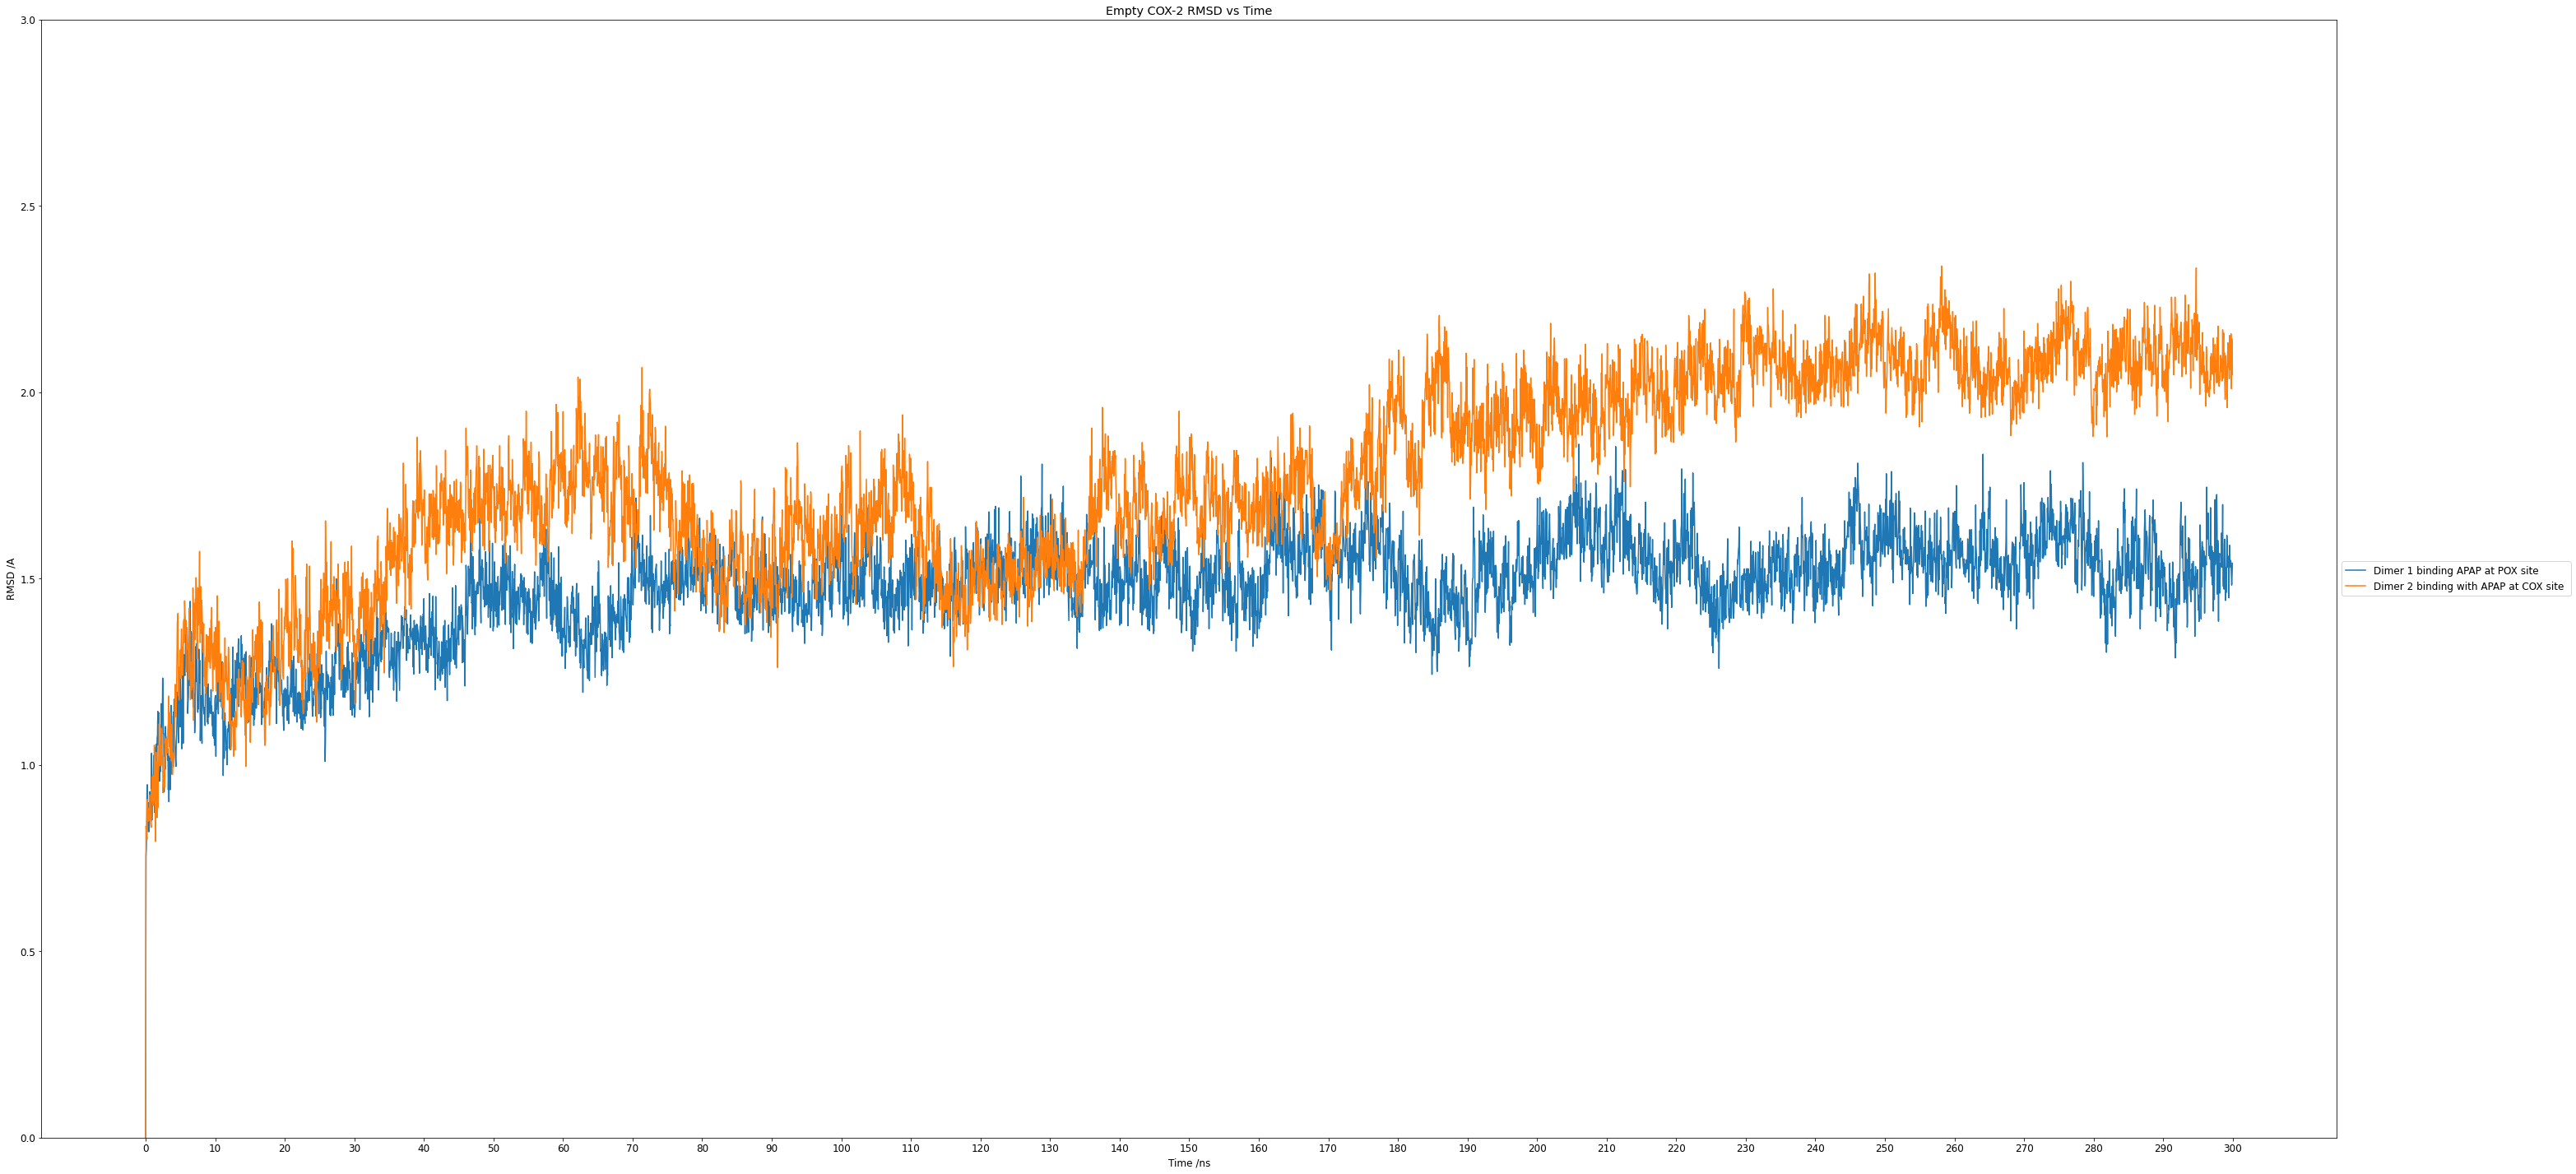

In [23]:
rmsd_traj = traj
pt.superpose(rmsd_traj, ref=0)
rmsd_dimer1 = pt.rmsd(rmsd_traj,ref=0, mask=':2-555@CA')
rmsd_dimer2 = pt.rmsd(rmsd_traj,ref=0, mask=':556-1108@CA')
print (rmsd_dimer1)
print (rmsd_dimer2)
md_time= list(np.arange(0,300,0.05))
print (len(md_time))
plt.figure(figsize = (50,25))
plt.rcParams['font.size'] = '12'
plt.plot(md_time,rmsd_dimer1,label= "Dimer 1 binding APAP at POX site")
plt.plot(md_time,rmsd_dimer2,label= "Dimer 2 binding with APAP at COX site ")
plt.xticks(range(0,301,10))
plt.xlabel('Time /ns')
plt.ylabel('RMSD /A')
plt.ylim(0, 3)
plt.title('Empty COX-2 RMSD vs Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

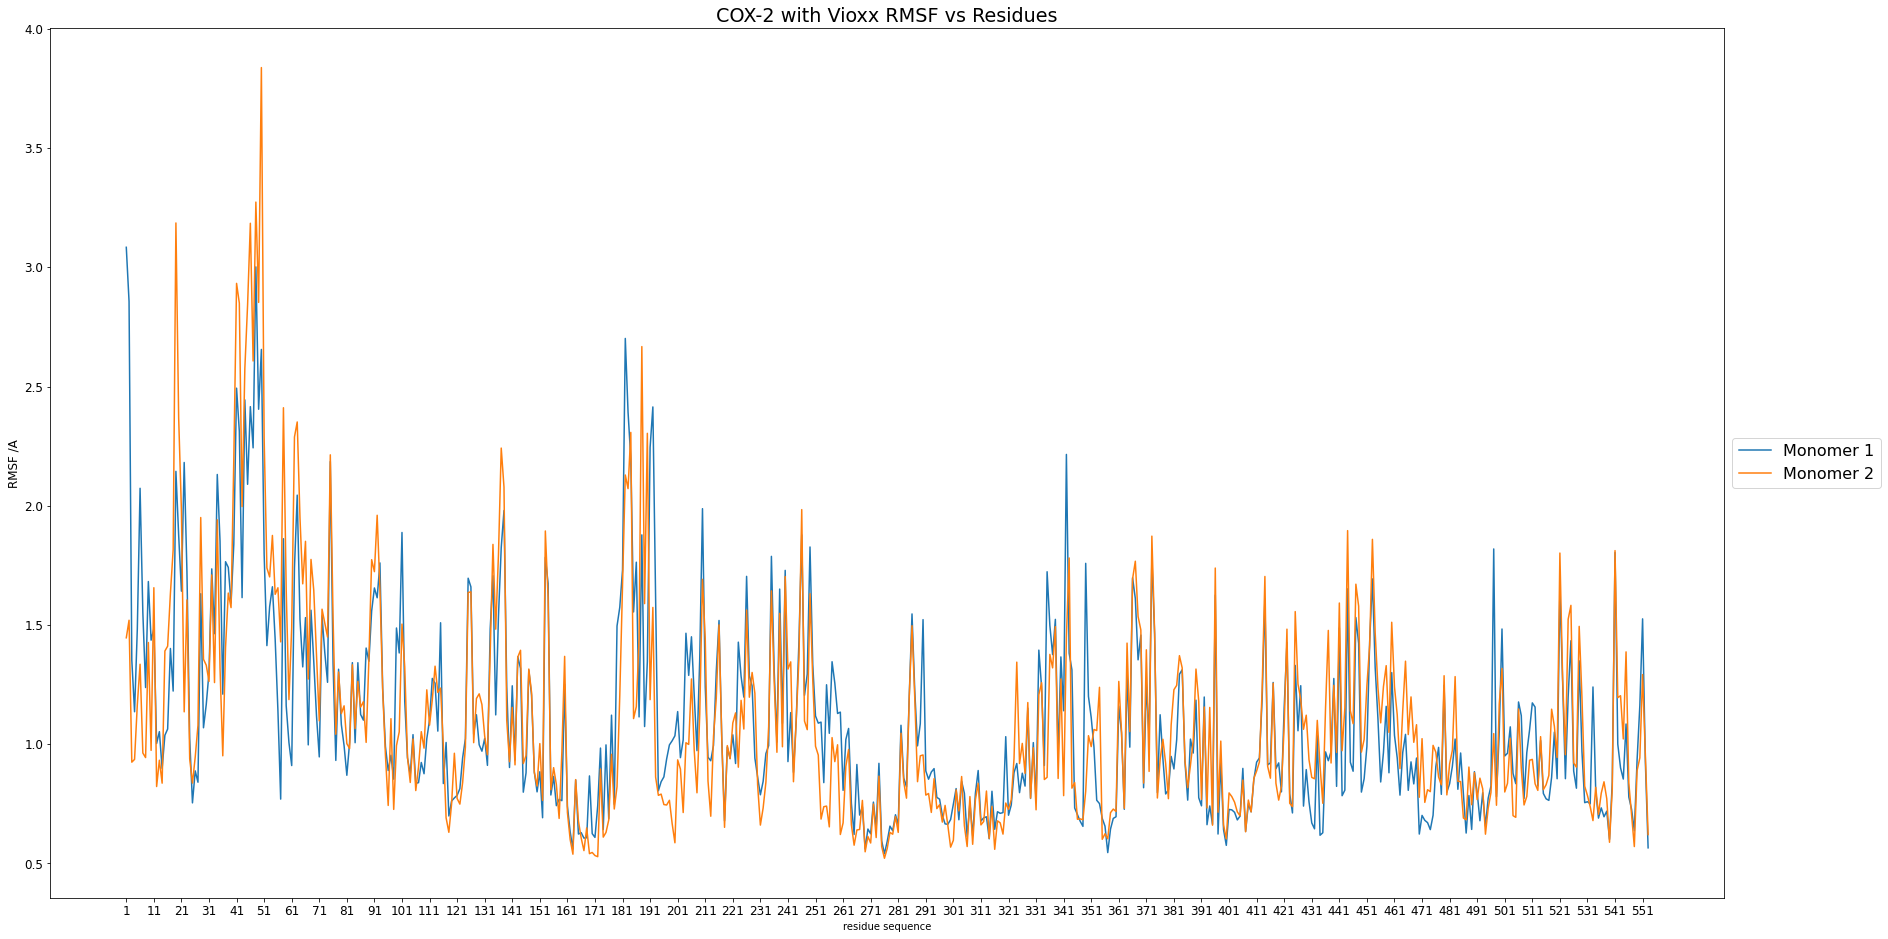

In [24]:
plt.figure(figsize = (30,16))
res_seq=np.array(range(1,554))
plt.plot(res_seq,Dimer_1.T[1],label= "Monomer 1")
plt.plot(res_seq,Dimer_2.T[1],label= "Monomer 2")
#do not visualize the head and tail residues, because they rmsf value and unlikely involves the allosteric regulation
plt.rcParams['font.size'] = '16'
plt.xticks(range(1,554,10))
plt.xlabel('residue sequence',fontdict = {'fontsize' : 10})
plt.ylabel('RMSF /A')
plt.title('COX-2 with Vioxx RMSF vs Residues')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

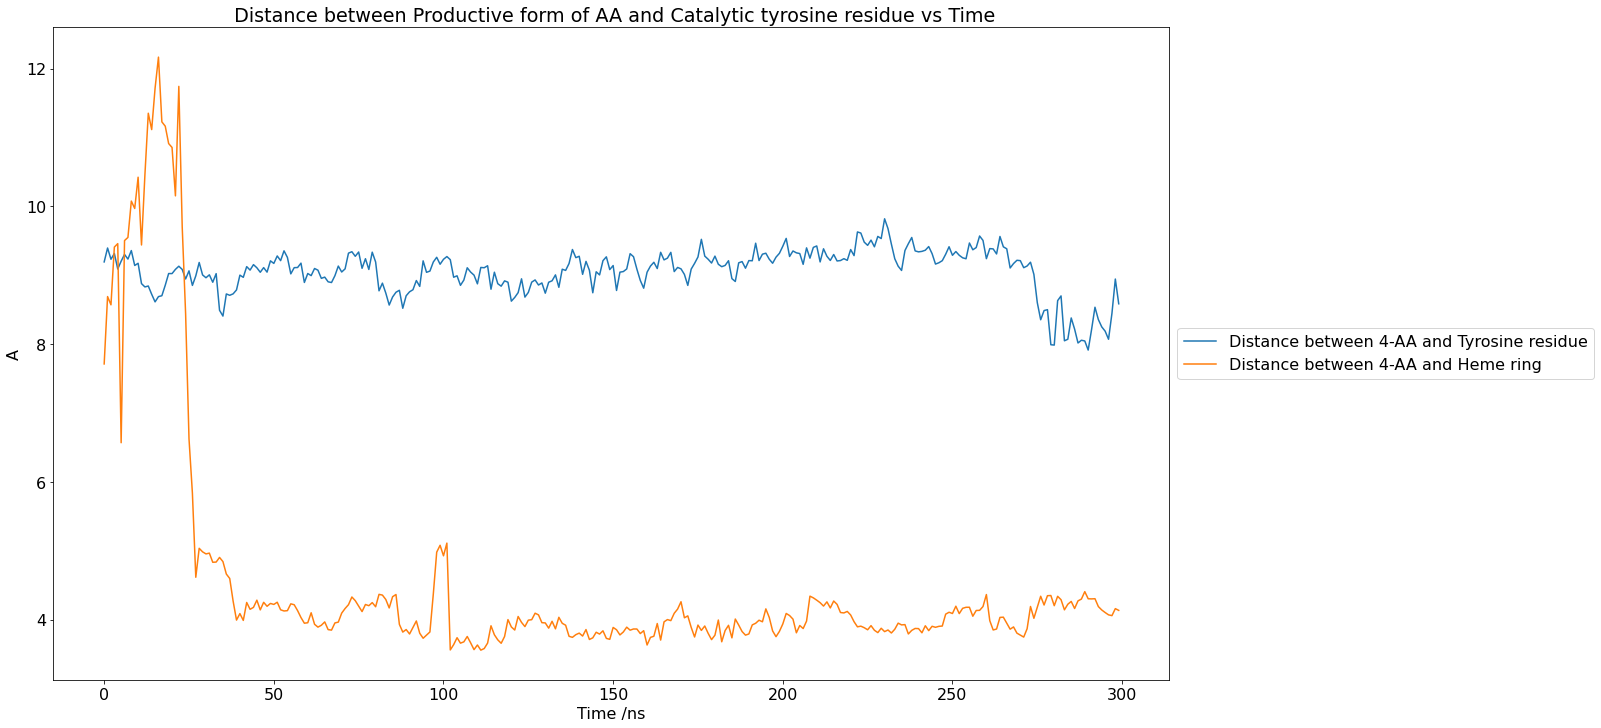

In [37]:
dist1= pt.distance(traj,':1 :908')
dist2= pt.distance(traj,':2 :554')

plt.figure(figsize = (20,12))
plt.plot(np.mean(dist1.reshape(300, 20), axis=1),label= "Distance between 4-AA and Tyrosine residue")
plt.plot(np.mean(dist2.reshape(300, 20), axis=1),label= "Distance between 4-AA and Heme ring")

plt.xlabel('Time /ns')
plt.ylabel('A')
plt.title(' Distance between Productive form of AA and Catalytic tyrosine residue vs Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

[  1   2   3 ... 551 552 553]
[3.08382519 2.85690207 1.35246799 ... 1.52580917 0.96168225 0.62116   ]


Text(0.5, 19.0, 'Number of residue')

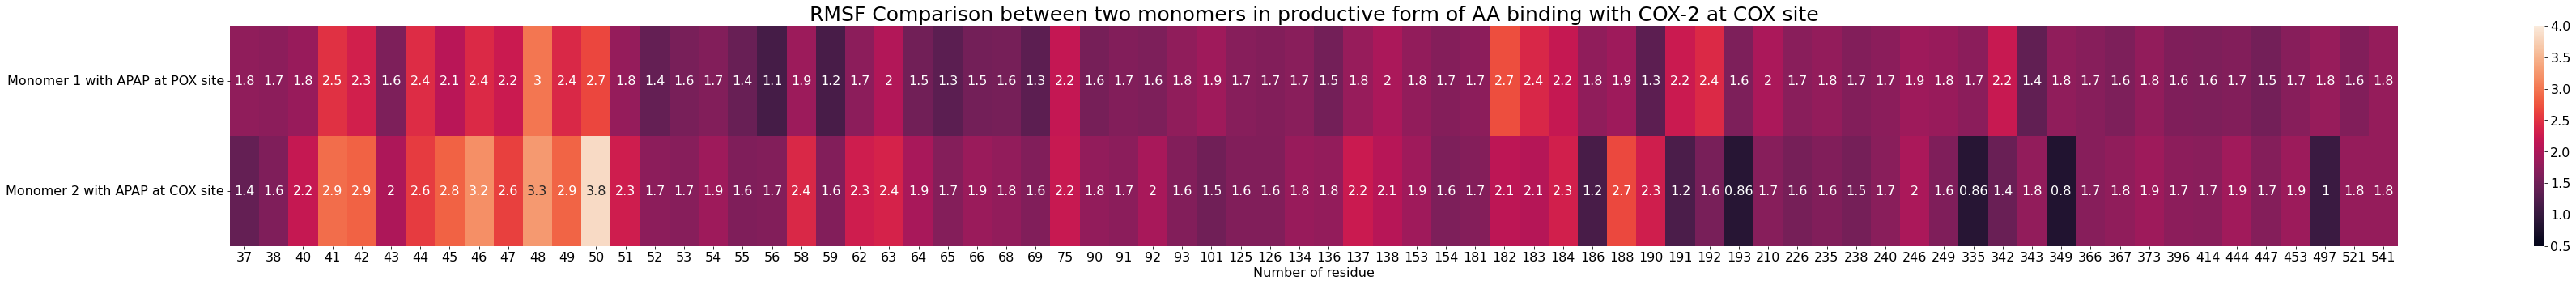

In [12]:
sub_name=['Monomer 1 with APAP at POX site','Monomer 2 with APAP at COX site',]
df = pd.DataFrame(index=sub_name)
res_seq=np.array(range(1,554))
print (res_seq)
#find the max value per column, per repeating subunit
max_rmsf=np.max(rmsf_stack,axis=0)
var_rmsf=np.var(rmsf_stack,axis=0)
print(max_rmsf)
df1 = df.copy()
for res in res_seq[(var_rmsf>=0)&(max_rmsf>1.6)]:
    if int(res) > 35 and int(res) < 544:
        df1[int(res)]=rmsf_stack[:,int(res)-1]
plt.figure(figsize = (60,5))
sns.heatmap(df1,annot=True,vmax=4,vmin=0.5)
plt.title('RMSF Comparison between two monomers in productive form of AA binding with COX-2 at COX site', fontdict = {'fontsize' : 25})
plt.xlabel('Number of residue')